ACME is one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

At ACME we thrive for making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Data Description:


Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order


X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me


Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.


**Goal(s):
Predict if a customer is happy or not based on the answers they give to questions asked.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import pandas_bokeh
# pandas_bokeh.output_notebook()

import scikitplot as skplt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

#Importing Classification algorithms

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import (
    LogisticRegression,
    LogisticRegressionCV,
    SGDClassifier,
    Perceptron,
    PassiveAggressiveClassifier,
    RidgeClassifier, 
    RidgeClassifierCV
)

from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from rgf.sklearn import RGFClassifier, FastRGFClassifier
from gpboost import GPBoostClassifier
from ngboost import NGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier, 
    ExtraTreesClassifier, 
    IsolationForest, 
    BaggingClassifier, 
    HistGradientBoostingClassifier
)

from imblearn.ensemble import (
    EasyEnsembleClassifier, 
    RUSBoostClassifier, 
    BalancedBaggingClassifier, 
    BalancedRandomForestClassifier 
)

from numpy import interp

class Progress:
    def __init__(self, value, end, title='Progress',buffer=100):
        self.title = title
        #when calling in a for loop it doesn't include the last number
        self.end = end
        self.buffer = buffer
        self.value = value + 1
        self.progress()

    def progress(self):
        maped = int(interp(self.value, [0, self.end], [0, self.buffer]))
        print(f'{self.title}: [{"#"*maped}{"-"*(self.buffer - maped)}]{self.value}/{self.end} {((self.value/self.end)*100):.2f}%', end='\r')

from sklearn import set_config
set_config(display='diagram')        

seed = 42

In [2]:
df=pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
df.describe().T

#X1 = More people agree that their order was delivered on time. (Mean = 4.33, Median = 5)
#X2 = People felt that the contents of their order was not as they expected. (Mean = 2.53, Median = 3)
#X3 = People were neautral about ordering everything they wanted to order. (Mean = 3.30, Median = 3)
#X4 = People somewhat agreed that they paid a good price for their order (Mean = 3.75, Medain = 4)
#X5 = People somewhat agreed that they were satisfied with their order (Mean = 3.65, Median = 4)
#X6 = People somewhat agreed that the app makes ordering easy (Mean = 4.25, Median = 4)

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


In [5]:
df.Y.value_counts()

1    69
0    57
Name: Y, dtype: int64

In [6]:
df.Y.value_counts(normalize = True) #Somewhat Balanced

1    0.547619
0    0.452381
Name: Y, dtype: float64

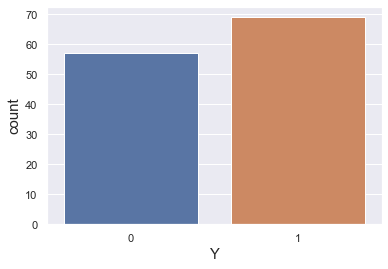

In [7]:
sns.countplot(x = 'Y', data = df);
#Roughly Balanced

In [8]:
df.columns[1:]

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

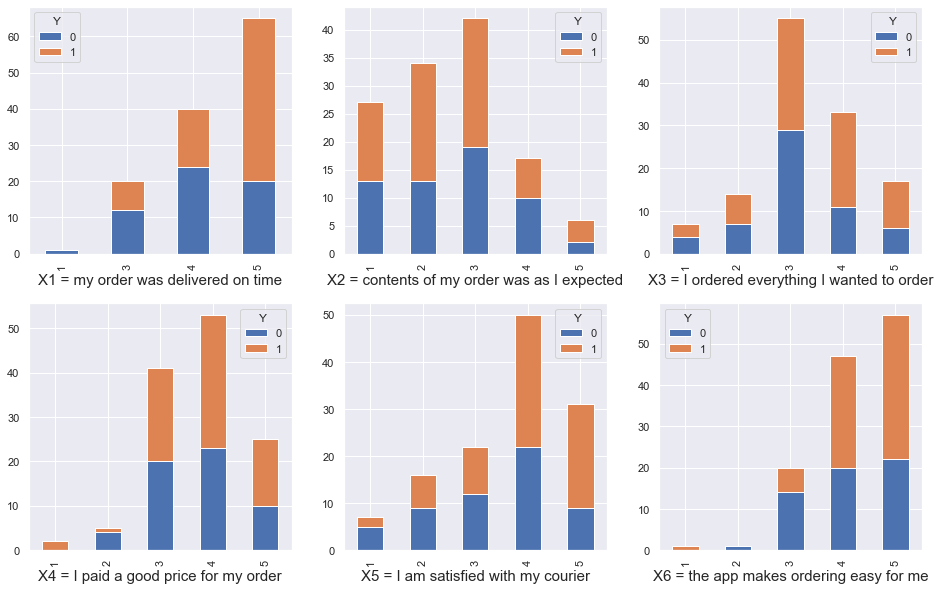

In [9]:
axis_names = ['X1 = my order was delivered on time', 'X2 = contents of my order was as I expected', 
              'X3 = I ordered everything I wanted to order', 'X4 = I paid a good price for my order',
              'X5 = I am satisfied with my courier', 'X6 = the app makes ordering easy for me']

fig, axes = plt.subplots(2,3, figsize=(16, 10))

for col, ax, name in zip(df.columns[1:],axes.flatten(), axis_names):
    pd.crosstab(index = df[col], columns = df['Y']).plot(kind = 'bar', stacked = True, ax = ax)
    ax.set(xlabel=name);

X1, X3, X5 and X6 shows a clear pattern where customers who replied above 3 are generally more satisfied with the service compared to those who gave a score below 3.

X2 and X4 are not quite discernable whether the customers are happy or unhappy with the service.

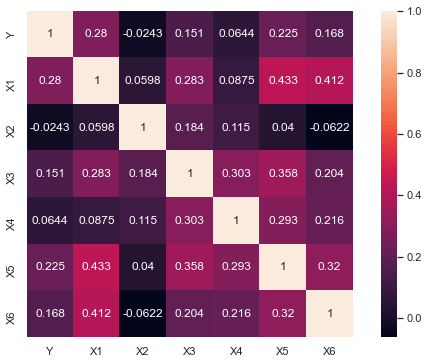

In [10]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, fmt='.3g', square  = True);

#X1, X3, X5 and X6 have low but significant correlation with the dependent variable.

In [11]:
#Categorizing features in order where 1 is the lowest and 5 is the highest.

for col in df.columns[1:]:
    print(df[col].unique())
    print()

[3 5 4 1]

[3 2 4 5 1]

[3 2 4 5 1]

[4 5 3 2 1]

[2 4 3 5 1]

[4 3 5 2 1]



In [12]:
for col in df.columns[1:]:
    df[col] = pd.Categorical(df[col], categories=[1,2,3,4,5], ordered=True)

In [13]:
df['X1']

0      3
1      3
2      5
3      5
4      5
      ..
121    5
122    5
123    5
124    4
125    5
Name: X1, Length: 126, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

### Sampling using SMOTE

In [14]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

# # import library
# from imblearn.over_sampling import SMOTEN
# from collections import Counter

# smote = SMOTEN(random_state = seed)

# # fit predictor and target variable
# x_smote, y_smote = smote.fit_resample(X, y)

# print('Original dataset shape', Counter(y))
# print('Resample dataset shape', Counter(y_smote))

In [15]:
# sns.countplot(y_smote);

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, 
#                                                     random_state = seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = seed, stratify = y)

In [17]:
print(X_train.shape)
print(X_test.shape)

(100, 6)
(26, 6)


In [18]:
print(y_train.shape)
print(y_test.shape)

(100,)
(26,)


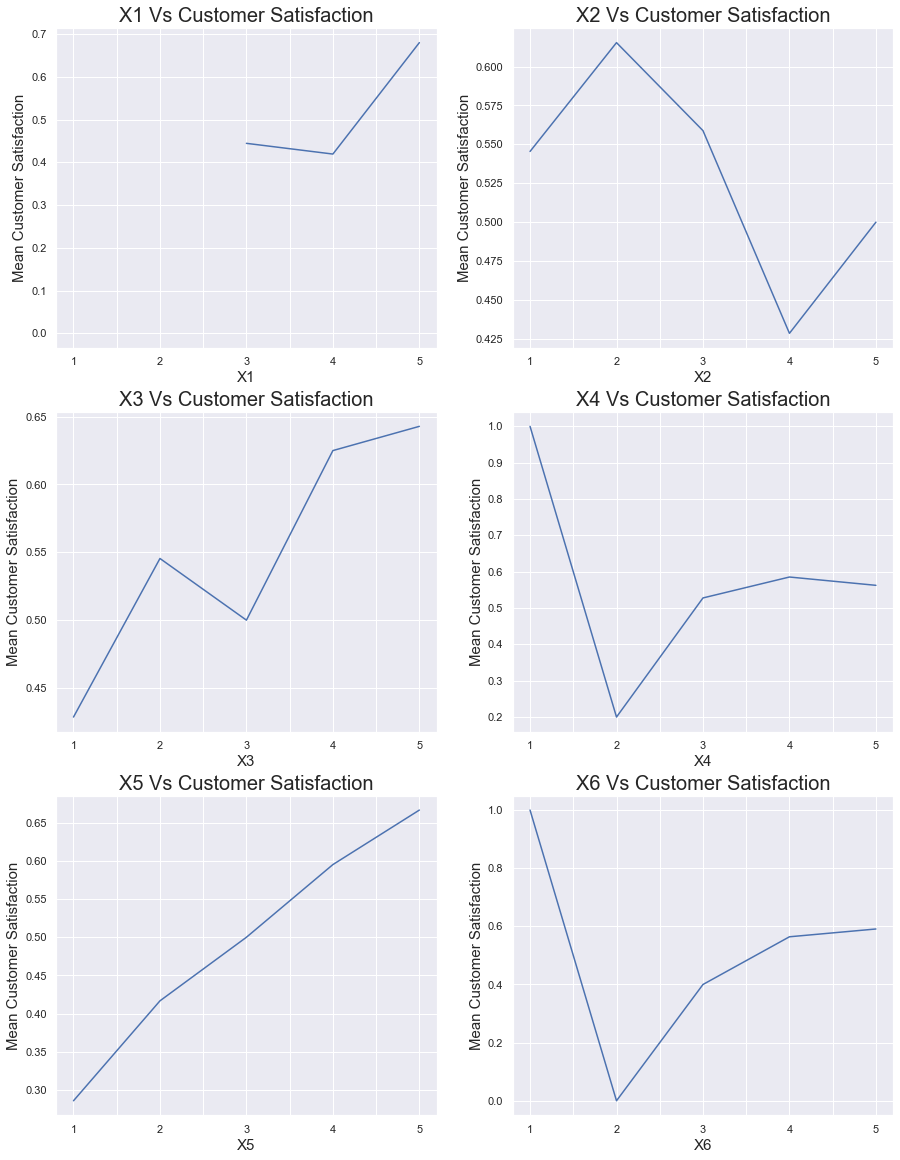

In [19]:
fig, axes = plt.subplots(3,2, figsize=(15, 20))

for col, ax in zip(X_train.columns, axes.flatten()):
    pd.concat([y_train, X_train], axis = 1).groupby(col).mean()['Y'].plot(ax = ax);
    ax.set_title(f'{col} Vs Customer Satisfaction');
    ax.set_ylabel('Mean Customer Satisfaction');

There is no discernible relation among the independent variable with the target variable. Hence, I will encode the all features using MeanEncoder.

# Feature Engineering

In [20]:
from feature_engine.encoding import MeanEncoder

mean_enc = MeanEncoder()

mean_enc.fit(X_train, y_train)

X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

print(mean_enc.variables)
print()
print(mean_enc.encoder_dict_)

None

{'X1': {1: 0.0, 2: nan, 3: 0.4444444444444444, 4: 0.41935483870967744, 5: 0.68}, 'X2': {1: 0.5454545454545454, 2: 0.6153846153846154, 3: 0.5588235294117647, 4: 0.42857142857142855, 5: 0.5}, 'X3': {1: 0.42857142857142855, 2: 0.5454545454545454, 3: 0.5, 4: 0.625, 5: 0.6428571428571429}, 'X4': {1: 1.0, 2: 0.2, 3: 0.5277777777777778, 4: 0.5853658536585366, 5: 0.5625}, 'X5': {1: 0.2857142857142857, 2: 0.4166666666666667, 3: 0.5, 4: 0.5952380952380952, 5: 0.6666666666666666}, 'X6': {1: 1.0, 2: 0.0, 3: 0.4, 4: 0.5641025641025641, 5: 0.5909090909090909}}


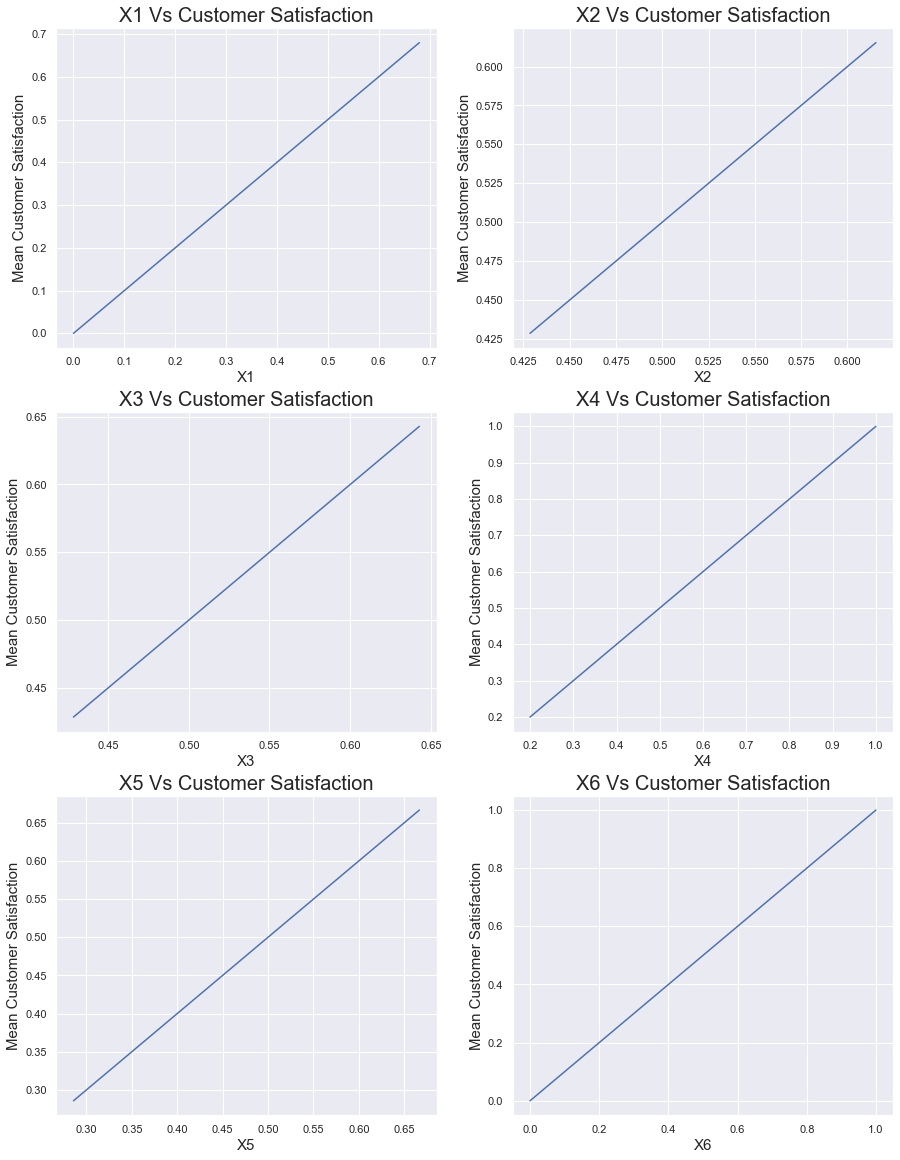

In [21]:
fig, axes = plt.subplots(3,2, figsize=(15, 20))

for col, ax in zip(X_train.columns, axes.flatten()):
    pd.concat([y_train, X_train], axis = 1).groupby(col).mean()['Y'].plot(ax = ax);
    ax.set_title(f'{col} Vs Customer Satisfaction');
    ax.set_ylabel('Mean Customer Satisfaction');

As illustrated above, now all features have a monotonic relation with the target variable.

# Base model Validation

In [22]:
from sklearn.model_selection import KFold, StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=seed, shuffle = True)

In [23]:
#Function for selecting the right model

class classif_models:
    
    def __init__(self, Xtrain, ytrain, preprocessor, cv):
        self.Xtrain = Xtrain
        self.ytrain = ytrain
        self.preprocessor = preprocessor 
        self.cv = cv
        
    def check_clf_models(self):
        
        models = [
            LogisticRegression(random_state = seed),
            LogisticRegressionCV(cv=10, random_state = seed),
            SGDClassifier(tol = 0.1, early_stopping = True, validation_fraction = 0.2, random_state = seed),
            Perceptron(tol = 0.1, early_stopping = True, validation_fraction = 0.2, random_state = seed),
            PassiveAggressiveClassifier(tol = 0.1, early_stopping = True, validation_fraction = 0.2, random_state = seed),
            RidgeClassifier(random_state = seed),
            RidgeClassifierCV(cv=10),
            LinearSVC(loss = 'hinge', random_state = seed),
            SVC(kernel = 'rbf', random_state = seed),
            NuSVC(random_state = seed),
            KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
            GaussianNB(), 
            BernoulliNB(),
            MLPClassifier(tol=0.1, early_stopping = True, validation_fraction = 0.2, random_state = seed),
            GaussianProcessClassifier(random_state = seed)
        ]
        
        acc = []
        acc_std = []
        f1 = []
        roc_auc = []
        prec = []
        recall = []
        bal_acc = []
        model_names = []
        
        print('Training using Non-Tree based models...')
        for model, i in zip(models, range(len(models))):
            pipe = Pipeline(steps = [('preprocessor', preprocessor), (type(model).__name__, model)])
            
            scores = cross_validate(pipe, 
                                    self.Xtrain, 
                                    self.ytrain,
                                    scoring = ['accuracy', 'f1', 'roc_auc', 'precision', 'recall', 
                                               'balanced_accuracy'],
                                    cv = self.cv, 
                                    n_jobs = -1)
            
            acc.append(list(scores.values())[2].mean()*100)
            acc_std.append(list(scores.values())[2].std()*100)
            f1.append(list(scores.values())[3].mean()*100)
            roc_auc.append(list(scores.values())[4].mean()*100)
            prec.append(list(scores.values())[5].mean()*100)
            recall.append(list(scores.values())[6].mean()*100)
            bal_acc.append(list(scores.values())[7].mean()*100)
            
            model_names.append(type(model).__name__)
            Progress(i, len(models))
            
        print()

    #Using Ensemble Models

        tree_models = [
            DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = seed),
            RandomForestClassifier(criterion='entropy', max_depth=6, class_weight='balanced', n_jobs=-1, random_state = seed), 
            XGBClassifier(use_label_encoder=False, eval_metric = 'error', seed = seed), 
            CatBoostClassifier(verbose = False, loss_function='CrossEntropy', eval_metric='TotalF1', random_seed = seed), 
            LGBMClassifier(random_state = seed), 
            AdaBoostClassifier(random_state = seed), 
            GradientBoostingClassifier(random_state = seed), 
            BaggingClassifier(random_state = seed), 
            ExtraTreesClassifier(criterion='entropy', max_depth=6, class_weight='balanced', n_jobs=-1, random_state = seed), 
            HistGradientBoostingClassifier(random_state = seed), 
            EasyEnsembleClassifier(random_state = seed), 
            RUSBoostClassifier(random_state = seed), 
            BalancedBaggingClassifier(random_state = seed), 
            BalancedRandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 6, random_state = seed), 
            RGFClassifier(loss = 'Log', algorithm='RGF_Sib'), 
            FastRGFClassifier(loss='LOGISTIC'),
            GPBoostClassifier(random_state = seed), 
            NGBClassifier(random_state = seed)
        ]
        
        print()
        print('Training Using Ensemble models...')
        for model, i in zip(tree_models, range(len(tree_models))):
            
            scores = cross_validate(model, 
                                    self.Xtrain, 
                                    self.ytrain,
                                    scoring = ['accuracy', 'f1', 'roc_auc', 'precision', 'recall', 
                                               'balanced_accuracy'],
                                    cv = self.cv, 
                                    n_jobs = -1)
            
            acc.append(list(scores.values())[2].mean()*100)
            acc_std.append(list(scores.values())[2].std()*100)
            f1.append(list(scores.values())[3].mean()*100)
            roc_auc.append(list(scores.values())[4].mean()*100)
            prec.append(list(scores.values())[5].mean()*100)
            recall.append(list(scores.values())[6].mean()*100)
            bal_acc.append(list(scores.values())[7].mean()*100)
            
            model_names.append(type(model).__name__)
            Progress(i, len(tree_models))
        
        print()
        self.df = pd.DataFrame({
            'Models': model_names, 
            'Acc %': acc, 
            'Acc STD %': acc_std, 
            'f1 %':f1,
            'ROC_AUC %' :roc_auc, 
            'Precision %': prec,
            'Recall %': recall, 
            'Balanced_Acc %': bal_acc 
        }).sort_values('f1 %', ascending = False, ignore_index = True).style.highlight_max(color = 'green')

        return self.df
    
# classif_models(Xtrain, ytrain, preprocessor, cv)
#.check_clf_models()

In [24]:
%%time
preprocessor = StandardScaler()

base_models = classif_models(X_train, y_train, preprocessor = preprocessor, cv = skf)
base_models.check_clf_models()

Training using Non-Tree based models...
Progress: [####################################################################################################]15/15 100.00%

Training Using Ensemble models...
Progress: [####################################################################################################]18/18 100.00%
Wall time: 56.2 s


,Models,Acc %,Acc STD %,f1 %,ROC_AUC %,Precision %,Recall %,Balanced_Acc %
0,MLPClassifier,57.000000,10.049876,70.716117,53.550000,56.694444,94.666667,52.833333
1,LogisticRegressionCV,60.000000,19.493589,67.038795,65.150000,60.880952,75.333333,57.666667
2,LogisticRegression,62.000000,21.817424,65.019148,63.983333,65.666667,67.666667,61.083333
3,GaussianNB,59.000000,13.000000,64.634199,56.033333,64.063492,72.333333,57.416667
4,RidgeClassifier,60.000000,20.493902,63.655511,64.416667,62.666667,67.666667,58.583333
5,RidgeClassifierCV,60.000000,20.493902,63.655511,64.416667,62.666667,67.666667,58.583333
6,BernoulliNB,58.000000,16.000000,63.418415,62.666667,62.250000,66.666667,56.833333
7,LGBMClassifier,61.000000,14.456832,62.747475,61.833333,65.285714,62.333333,60.416667
8,GPBoostClassifier,61.000000,14.456832,62.747475,61.833333,65.285714,62.333333,60.416667
9,HistGradientBoostingClassifier,59.000000,12.206556,61.132756,61.816667,63.202381,60.666667,58.333333


Currently, with all features, the best performing model can only achieve an accuracy of 70%, which varies by about 15%. We can select only the features with the highest predictive power using Feature selection.

# Feature Selection

In [25]:
%%time
#Bidirectional Elimination

model = ExtraTreesClassifier(criterion='entropy', max_depth=6, class_weight='balanced', 
                             n_jobs=-1, random_state = seed)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

bi = SFS(model, k_features=(1,6), scoring = 'f1', forward=True, 
         floating=True, cv=skf)

bi.fit(X_train, y_train)

 
print() 
print(f'Best Score: {bi.k_score_*100:.3f} %')
    
bi.k_feature_names_


Best Score: 66.614 %
Wall time: 1min 29s


('X1', 'X6')

In [26]:
X_train_pars = X_train.loc[:,bi.k_feature_names_]
X_test_pars = X_test.loc[:,bi.k_feature_names_]

In [27]:
%%time
#checking all models again

pars_models = classif_models(X_train_pars, y_train, preprocessor = preprocessor, cv = skf)
pars_models.check_clf_models()

Training using Non-Tree based models...
Progress: [####################################################################################################]15/15 100.00%

Training Using Ensemble models...
Progress: [####################################################################################################]18/18 100.00%
Wall time: 46.4 s


,Models,Acc %,Acc STD %,f1 %,ROC_AUC %,Precision %,Recall %,Balanced_Acc %
0,CatBoostClassifier,66.000000,14.282857,72.263736,68.275000,67.123016,84.666667,63.333333
1,BaggingClassifier,66.000000,20.099751,72.068931,70.425000,64.861111,83.000000,63.750000
2,KNeighborsClassifier,64.000000,14.966630,69.692641,61.633333,66.730159,78.666667,61.333333
3,GradientBoostingClassifier,64.000000,18.547237,69.263736,68.275000,64.837302,80.666667,61.333333
4,DecisionTreeClassifier,64.000000,18.547237,69.263736,68.275000,64.837302,80.666667,61.333333
5,XGBClassifier,63.000000,20.024984,67.185814,73.225000,63.726190,76.666667,60.333333
6,RGFClassifier,63.000000,20.024984,67.185814,74.425000,63.726190,76.666667,60.333333
7,BalancedRandomForestClassifier,63.000000,20.024984,66.852481,68.275000,64.583333,74.666667,60.333333
8,RandomForestClassifier,63.000000,20.024984,66.614386,68.275000,65.416667,73.000000,60.750000
9,ExtraTreesClassifier,63.000000,20.024984,66.614386,72.025000,65.416667,73.000000,60.750000


In [28]:
# %%time
# import optuna
# from sklearn.model_selection import cross_val_score

# def objective(trial):

#     cat_iterations = trial.suggest_int("cat_iterations", 10, 2500)
#     cat_depth = trial.suggest_int("cat_depth", 1, 7)
#     cat_learning_rate = trial.suggest_float("cat_learning_rate", 0.0001, 0.4)
#     cat_boosting_type = trial.suggest_categorical("cat_boosting_type", ['Ordered', 'Plain'])
#     cat_l2_leaf_reg = trial.suggest_float("cat_l2_leaf_reg", 0.1, 100.0)
#     cat_border_count = trial.suggest_int("cat_border_count", 5, 200)
    
#     model = CatBoostClassifier(verbose = False, 
#                                loss_function='CrossEntropy', 
#                                eval_metric='TotalF1', 
#                                random_seed = seed, 
#                                iterations = cat_iterations, 
#                                depth = cat_depth, 
#                                learning_rate = cat_learning_rate, 
#                                boosting_type = cat_boosting_type, 
#                                l2_leaf_reg = cat_l2_leaf_reg, 
#                                border_count = cat_border_count)

#     cv_score = cross_val_score(model, 
#                                X_train_pars, 
#                                y_train, 
#                                cv=StratifiedKFold(n_splits=10, random_state=seed, shuffle=True),
#                                scoring='f1')
#     score = cv_score.mean()
#     return score

# study = optuna.create_study(
#     direction="maximize",
#     sampler=optuna.samplers.CmaEsSampler(warn_independent_sampling = False)
# ) #TPESampler(seed = seed, multivariate = True)

# study.optimize(objective, 
#                n_trials=120, 
#                n_jobs = -1, 
#                show_progress_bar = True)
# print()
# print(f'Best Score: {study.best_value*100:.3f} %')
# print()
# print(f'Best Params:')
# print(study.best_params)

# results = study.trials_dataframe()
# results['value'].sort_values().reset_index(drop=True).plot();
# plt.title('Convergence plot');
# plt.xlabel('Iteration');
# plt.ylabel('Score');

# chosen_param = {
#     i.replace("cat_", ""):j for i, j in zip(study.best_params.keys(), study.best_params.values())
# }
# print()
# print(chosen_param)

{'n_estimators': 2400, 'max_depth': 3, 'learning_rate': 0.001356503708576118, 'booster': 'dart', 'gamma': 0.5520784608485181, 'subsample': 0.8876888694820114, 'colsample_bytree': 0.7827523330159124, 'colsample_bylevel': 0.87803537416836, 'colsample_bynode': 0.8863170943720576, 'random_state': 42, 'reg_lambda': 1, 'min_child_weight': 10, 'base_score': 0.30833883397235473, 'max_delta_step': 0}

In [29]:
cat_params = {'iterations': 1255, 'depth': 4, 'learning_rate': 0.3414634719334662, 
              'boosting_type': 'Ordered', 'l2_leaf_reg': 50.19286160663005, 
              'border_count': 102}

In [30]:
cat = CatBoostClassifier(verbose = False, 
                         loss_function='CrossEntropy', 
                         eval_metric='TotalF1', 
                         random_seed = seed, 
                         **cat_params)
cat

In [31]:
#for evaluating model

class validate_on_test:
    
    def __init__(self, model, Xtrain, ytrain, Xtest, ytest, cv, beta, optimize):
        self.model = model
        self.Xtrain = Xtrain
        self.ytrain = ytrain
        self.Xtest = Xtest
        self.ytest = ytest
        self.cv = cv
        self.beta = beta
        self.optimize = optimize
        
        self.Xtrain = self.Xtrain.values
        self.ytrain = self.ytrain[self.ytrain.columns[0]].values
        self.Xtest = self.Xtest.values
        self.ytest = self.ytest[self.ytest.columns[0]].values
        
    def evaluate_model(self):
        
        from texttable import Texttable
        t = Texttable()
        
        if type(self.model).__name__ == 'CalibratedClassifierCV':
            if type(self.model.base_estimator).__name__ == 'Pipeline':
                model_name = 'Cal_' + type(list(self.model.base_estimator.named_steps.items())[1][1]).__name__
            else:
                model_name = 'Cal_' + type(self.model.base_estimator).__name__
        else:
            try: 
                type(list(self.model.named_steps.items())[1][1]).__name__
                
            except AttributeError:
                model_name = type(self.model).__name__
                
            else:
                model_name = type(list(self.model.named_steps.items())[1][1]).__name__
            
        print('+' * len(f' {model_name} '))
        print(f' {model_name} ')
        print('+' * len(f' {model_name} '))
        print()

        print('Performing Cross-Validation...')
        print('------------------------------------------')
        t.set_deco(t.VLINES)
        t.add_rows([['CV#', 'Accuracy %', 'f1 Score %', 'ROC-AUC %']], header = False)
        print(t.draw())
        print('------------------------------------------')
        t.reset()
        t.set_deco(t.HLINES)
        
        thresholds = np.arange(0, 1, 0.001)
        
        # apply threshold to positive probabilities to create labels
        def to_labels(pos_probs, threshold):
            return (pos_probs >= threshold).astype('int64')

        accuracy = []
        f1_score = []
        roc_auc_score = []
        fold_no = 1

        for train_index, test_index in self.cv.split(self.Xtrain,self.ytrain):
            X_train_kfold, X_val_kfold = self.Xtrain[train_index], self.Xtrain[test_index]
            y_train_kfold, y_val_kfold = self.ytrain[train_index], self.ytrain[test_index]

            classifier = self.model

            classifier.fit(X_train_kfold, y_train_kfold) 
            y_pred = classifier.predict(X_val_kfold)
            y_probs = classifier.predict_proba(X_val_kfold)
           
            accuracy.append(np.round(metrics.accuracy_score(y_val_kfold, y_pred)*100,3))
            f1_score.append(np.round(metrics.f1_score(y_val_kfold, y_pred)*100,3))
            roc_auc_score.append(np.round(metrics.roc_auc_score(y_val_kfold, y_probs[:,1])*100,3))
            
            t.set_cols_align(["c", "c", "c", "c"])
            t.add_row([fold_no, accuracy[fold_no-1],  f1_score[fold_no-1],  roc_auc_score[fold_no-1]])
            print(t.draw())
            t.reset()
        
            fold_no += 1
                
        print()
        print(f'*** {model_name} Mean CV Scores ***')
        print('=' * len(f'*** {model_name} Mean CV Scores ***'))
        print(f'ROC AUC   : {np.mean(roc_auc_score):.3f} ± {np.std(roc_auc_score):.1f} %')
        print(f'f1        : {np.mean(f1_score):.3f} ± {np.std(f1_score):.1f} %')
        print(f'Accuracy  : {np.mean(accuracy):.3f} ± {np.std(accuracy):.1f} %')
        print()
        print("---" * 40)

        y_pred = classifier.predict(self.Xtest)
        y_probs = classifier.predict_proba(self.Xtest)
        
        self.y_probs = y_probs

        print()
        print('====================================')
        print("Classification report on Test set:")
        print('====================================')
        print()
        print(metrics.classification_report(self.ytest, y_pred))
        print()
        print("---" * 40)
        print()
        
        print(f'*** {model_name} scores on TEST set ***')
        print('=' * len(f'*** {model_name} scores on TEST set ***'))
        print(f'ROC AUC   : {metrics.roc_auc_score(self.ytest, y_probs[:,1])*100:.4f} %')
        print(f'f1        : {metrics.f1_score(self.ytest, y_pred)*100:.4f} %')
        print(f'Accuracy  : {metrics.accuracy_score(self.ytest, y_pred)*100:.4f} %')
        print()
        
        print("---" * 40)
        
        if self.beta == 'auto':
            if self.optimize == 'fbeta':
                beta_array = np.arange(0.5,2.05,0.05)

                # evaluate each threshold
                beta_val_array = []
                best_f1 = []
                best_threshold = []
                best_acc = []
                print()
                print('Estimating New Probability Threshold...')

                for b, i in zip(beta_array, range(len(beta_array))):

                    beta_val_array.append(b)

                    fbeta_score = [metrics.fbeta_score(self.ytest, 
                                                       to_labels(self.y_probs[:,1], t), 
                                                       beta = b) for t in thresholds]

                    acc = [metrics.accuracy_score(self.ytest,
                                                  to_labels(self.y_probs[:,1], t)) for t in thresholds]
                    
                    ix = np.argmax(fbeta_score)
                        
                    best_f1.append(fbeta_score[ix])
                    best_acc.append(acc[ix])
                    best_threshold.append(thresholds[ix])

                    Progress(i, len(beta_array))
            
                print()
                score_df = pd.DataFrame({
                    'threshold': best_threshold,
                    'Beta' : beta_val_array,
                    'fbeta': best_f1, 
                    'accuracy' : best_acc
                }).sort_values(self.optimize, ascending = False, ignore_index = True)

                self.score_df = score_df
                
                print()
                print('Best F-beta, Accuracy, Beta & Threshold:')
                print('========================================')
                print(f'Beta      : {score_df.iloc[0, 1]:.2f}')
                print(f'Threshold : {score_df.iloc[0, 0]*100:.2f} %')
                print(f'F-beta    : {score_df.iloc[0, 2]*100:.4f} %')
                print(f'Accuracy  : {score_df.iloc[0, 3]*100:.4f} %')
                print()
                
                thresh_val = score_df.iloc[0,0]
                self.tuned_pred = np.where(self.y_probs[:,1] >= thresh_val, 1, 0).astype('int64')
                self.new_prob_threshold = thresh_val
                
                plot_df = pd.DataFrame({
                    'threshold' : thresholds, 
                    'fbeta' : [metrics.fbeta_score(self.ytest,
                                                   to_labels(self.y_probs[:,1], t),
                                                   beta = score_df.iloc[0, 1]) for t in thresholds], 
                    'accuracy': acc
                })
                
            else:
                fbeta_score = [metrics.fbeta_score(self.ytest, 
                                                       to_labels(self.y_probs[:,1], t), 
                                                       beta = 1) for t in thresholds]
                
                acc = [metrics.accuracy_score(self.ytest,
                                                  to_labels(self.y_probs[:,1], t)) for t in thresholds]
                
                ix = np.argmax(acc)
                
                score_df = pd.DataFrame({
                    'threshold': thresholds,
                    'fbeta': fbeta_score, 
                    'accuracy' : acc
                }).sort_values(self.optimize, ascending = False, ignore_index = True)

                self.score_df = score_df
                plot_df = score_df
            
                print()
                print('Best F1, Accuracy, & Threshold:')
                print('===============================')
                print(f'Threshold : {score_df.iloc[0, 0]*100:.2f} %')
                print(f'F1        : {score_df.iloc[0, 1]*100:.4f} %')
                print(f'Accuracy  : {score_df.iloc[0, 2]*100:.4f} %')
                print()
                
                thresh_val = score_df.iloc[0, 0]
                self.tuned_pred = np.where(self.y_probs[:,1] >= thresh_val, 1, 0).astype('int64')
                self.new_prob_threshold = thresh_val
            
        else:
            beta_val = self.beta

            # evaluate each threshold
            fbeta_score = [metrics.fbeta_score(self.ytest, 
                                               to_labels(self.y_probs[:,1], t), 
                                               beta = beta_val) for t in thresholds]
            
            acc = [metrics.accuracy_score(self.ytest,
                                          to_labels(self.y_probs[:,1], t)) for t in thresholds]
                    
            score_df = pd.DataFrame({
                'threshold': thresholds,
                'fbeta': fbeta_score, 
                'accuracy' : acc
            }).sort_values(self.optimize, ascending = False, ignore_index = True)
            
            self.score_df = score_df
            plot_df = score_df
            
            print('Best F-beta, Accuracy, Beta & Threshold:')
            print('========================================')
            print(f'Beta      : {self.beta}')
            print(f'Threshold : {score_df.iloc[0,0]*100:.4f} %')
            print(f'F-beta    : {score_df.iloc[0,1]*100:.4f} %')
            print(f'Accuracy  : {score_df.iloc[0,2]*100:.4f} %')
            print()
            
            thresh_val = score_df.iloc[0,0]
            self.new_prob_threshold = thresh_val
            self.tuned_pred = np.where(self.y_probs[:,1] >= thresh_val, 1, 0).astype('int64')
            
        print("---" * 40)
        
        print('=================================================================================')
        print(' Threshold-Tuning Curve, ROC-AUC Plot, Precision-Recall Curve & Confusion Matrix ')
        print('=================================================================================')
        
        #All Train set
        
        train_probs = classifier.predict_proba(self.Xtrain)
        
        all_f = []
        all_acc = []
        
        for t, i in zip(thresholds, range(len(thresholds))):
            all_f.append(metrics.f1_score(self.ytrain, 
                                          to_labels(train_probs[:,1], t)))
            
            all_acc.append(metrics.accuracy_score(self.ytrain, 
                                                  to_labels(train_probs[:,1], t)))
            
            Progress(i, len(thresholds))
        
        print()
        
        fig = plt.figure(figsize = (11.5,5));
        ax1 = fig.add_subplot(121);
        ax2 = fig.add_subplot(122);
        
        #Train set
        sns.lineplot(x = thresholds, y = all_f, ax = ax1, label = 'Train F1 scores').\
            set_title('Threshold for Max F-score');
        
        ax1.axvline(thresholds[np.argmax(all_f)], color = 'red', linestyle = '--', 
           lw = 2, label = f'Train Thresh = {thresholds[np.argmax(all_f)]*100:.2f} %');
        
        sns.lineplot(x = thresholds, y = all_acc, ax = ax2, label = 'Train Accuracy').\
            set_title('Threshold for Max Accuracy');
        
        ax2.axvline(thresholds[np.argmax(all_acc)], color = 'red', linestyle = '--', 
           lw = 2, label = f'Train Thresh = {thresholds[np.argmax(all_acc)]*100:.2f} %');

        plt.tight_layout();
        
        #Test set
        f_df = plot_df.sort_values('fbeta', ascending = False, ignore_index = True)
        acc_df = plot_df.sort_values('accuracy', ascending = False, ignore_index = True)
        
        sns.lineplot(x = 'threshold', y = 'fbeta', data = plot_df, 
                     label = 'Test F-score', ax = ax1).set_title('Threshold for Max F-score');
        
        ax1.axvline(f_df.iloc[0,0], color = 'black', linestyle = '--', 
                   label = f' Test F-score Thresh = {f_df.iloc[0,0]*100:.2f} %');
        
        ax1.legend(loc='lower right');
        
        sns.lineplot(x = 'threshold', y = 'accuracy', data = plot_df, 
                     label = 'Test Accuracy', ax = ax2).set_title('Threshold for Max Accuracy');
        
        ax2.axvline(acc_df.iloc[0,0], color = 'black', linestyle = '--', 
                   label = f' Test Accuracy Thresh = {acc_df.iloc[0,0]*100:.2f} %');

        ax2.legend(loc='lower right');
        plt.tight_layout()
        
        #roc-auc, precision-recall curve
        fig = plt.figure(figsize = (13,4.5));
        ax1 = fig.add_subplot(121);
        ax2 = fig.add_subplot(122);
        
        #roc curve
        fpr, tpr, thresh = metrics.roc_curve(self.ytest, y_probs[:,1])
        J = tpr - fpr
        ix = np.argmax(J)

        ax1.plot([0,1], [0,1], linestyle='--', label='No Skill')
        ax1.plot(fpr, tpr, marker='.', 
                 label=f'roc-auc = {metrics.roc_auc_score(self.ytest, y_probs[:,1])*100:.2f} %')
        
        ax1.scatter(fpr[ix], tpr[ix], marker='o', color='black', 
                    label=f'Best threshold = {thresh[ix]*100:.2f} %')
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend();
        
        #precision-recall curve
        precision, recall, thresh = metrics.precision_recall_curve(self.ytest, y_probs[:,1])
        fscore = (2 * precision * recall) / (precision + recall)
        ix = np.argmax(fscore)
        ax2.plot(recall, precision, marker='.', label=f'F1 Score = {fscore[ix]*100:.2f} %')
        ax2.scatter(recall[ix], precision[ix], marker='o', color='black', 
                       label=f'Best Thresh = {thresh[ix]*100:.2f} %')
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend()

        #Confusion Matrix
        fig = plt.figure(figsize = (13,4));
        ax1 = fig.add_subplot(121);
        ax2 = fig.add_subplot(122);
        
        skplt.metrics.plot_confusion_matrix(self.ytest, y_pred, ax = ax1, text_fontsize = 'large', 
                                            cmap='YlGn');
    
        
        skplt.metrics.plot_confusion_matrix(self.ytest, self.tuned_pred, ax = ax2, text_fontsize = 'large',
                                            cmap='YlGn');
        
        ax1.title.set_text('With Prob. Threshold = 50 %');
        ax2.title.set_text(f'With New Prob. Threshold = {thresh_val*100:.2f} %');
        
# validate_on_test(model, Xtrain, ytrain, Xtest, ytest, cv, beta = 'auto', optimize = 'fbeta')
#.evaluate_model()

++++++++++++++++++++
 CatBoostClassifier 
++++++++++++++++++++

Performing Cross-Validation...
------------------------------------------
CV# | Accuracy % | f1 Score % | ROC-AUC %
------------------------------------------
 1        70         72.727      62.500  
 2        70           80        81.250  
 3        70           80        81.250  
 4        70           80        81.250  
 5        80         85.714      87.500  
 6        70         76.923        94    
 7        20           20          22    
 8        30         36.364        40    
 9        60           50          82    
10        80         83.333        92    

*** CatBoostClassifier Mean CV Scores ***
ROC AUC   : 72.375 ± 22.6 %
f1        : 66.506 ± 21.7 %
Accuracy  : 62.000 ± 19.4 %

------------------------------------------------------------------------------------------------------------------------

Classification report on Test set:

              precision    recall  f1-score   support

           0    

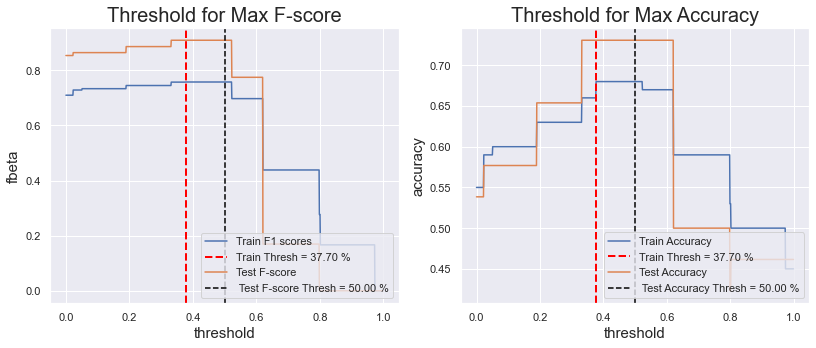

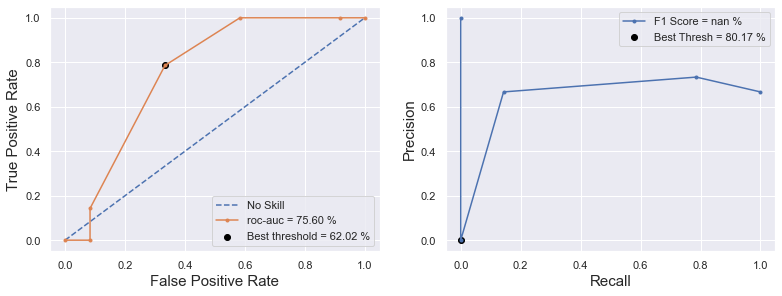

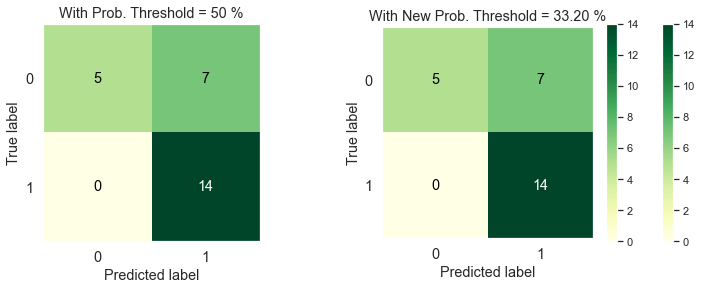

In [32]:
%%time
cat_model = validate_on_test(cat, 
                            X_train_pars, 
                            y_train.to_frame(), 
                            X_test_pars, 
                            y_test.to_frame(), 
                            cv = skf, 
                            beta = 'auto', 
                            optimize = 'fbeta')

cat_model.evaluate_model()

In [33]:
#creating pipeline for model deployment

catboost_pipe = Pipeline(steps = [
    ('mean_encoder', MeanEncoder()), 
    ('cat', cat)
])

In [36]:
from pyaml import yaml

#training the model on the whole dataset
catboost_pipe.fit(X.loc[:,['X1', 'X6']],y)

yaml.dump(catboost_pipe, open('catboost.yaml','w'))